In [1]:
## 1. Import Libraries & Load Dataset

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Load Dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
## 2. Initialize Models

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM (RBF)": SVC(kernel='rbf', probability=True)
}

In [6]:
## 3. Train Models & Collect Metrics

In [7]:
metrics = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    metrics.append([name, acc, prec, rec, f1])

results = pd.DataFrame(metrics, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
results

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,1.000000,1.00000,1.000000,1.000000
1,KNN,1.000000,1.00000,1.000000,1.000000
2,Decision Tree,1.000000,1.00000,1.000000,1.000000
3,Random Forest,1.000000,1.00000,1.000000,1.000000
4,Naive Bayes,0.977778,0.97619,0.974359,0.974321
5,SVM (RBF),1.000000,1.00000,1.000000,1.000000


In [8]:
## 4. Accuracy Comparison Bar Chart

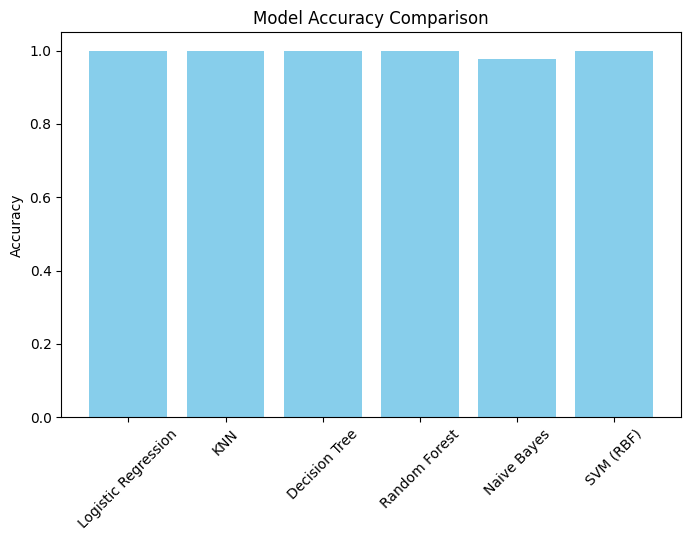

In [9]:
plt.figure(figsize=(8,5))
plt.bar(results["Model"], results["Accuracy"], color='skyblue')
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

In [10]:
## 5. Confusion Matrix of Best Model

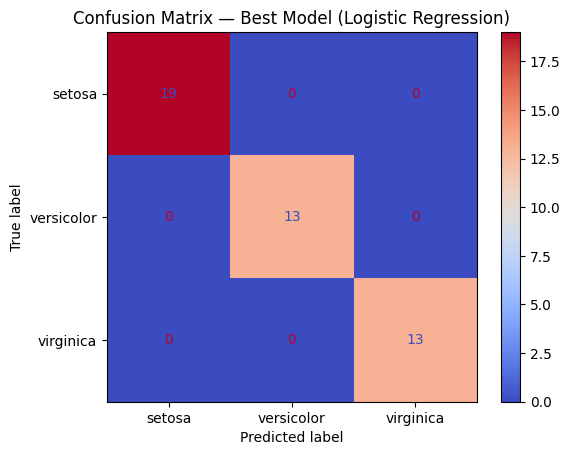

'Logistic Regression'

In [11]:
best_model_name = results.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

# Predict again
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='coolwarm')
plt.title(f"Confusion Matrix — Best Model ({best_model_name})")
plt.show()

best_model_name